# <img src="assets/logo_infnetv1.png" alt="Infnet logo" height="45"/> Projeto de Disciplina Algoritmos de Clusterização
<img src="https://img.shields.io/badge/python-v._3.11.5-blue?style=flat-square&logo=python&logoColor=white" alt="python_logo" height="20"/>
<img src="https://img.shields.io/badge/jupyter-v._5.7.2-blue?style=flat-square&logo=jupyter&logoColor=white" alt="jupyter_logo" height="20"/>
<img src="https://img.shields.io/badge/anaconda-v._23.7.4-blue?style=flat-square&logo=anaconda&logoColor=white" alt="anaconda_logo" height="20"/>

#### Aluno: 

- Lauro Barbosa <a href="https://github.com/LMRocha/pd_algoritmos_clusterizacao"><img src="https://img.shields.io/badge/Github-151b23?style=flat-square&logo=github" alt="github_logo" height="20"/></a>

### Sobre o projeto:

---

Se trata de um modelo de aprendizagem não supervisionado de clusterização relativos a dados de paises ao redor do mundo. Os dados foram extraídos do site do <a href="https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data">`Kaggle`</a>.

#### Convenções de reprodutibilidade:

- Todas as bibliotecas se encontram no arquivo `📄requirements.txt`
- Para mais informções, consulte nosso `README.md`

## Ambiente de execução

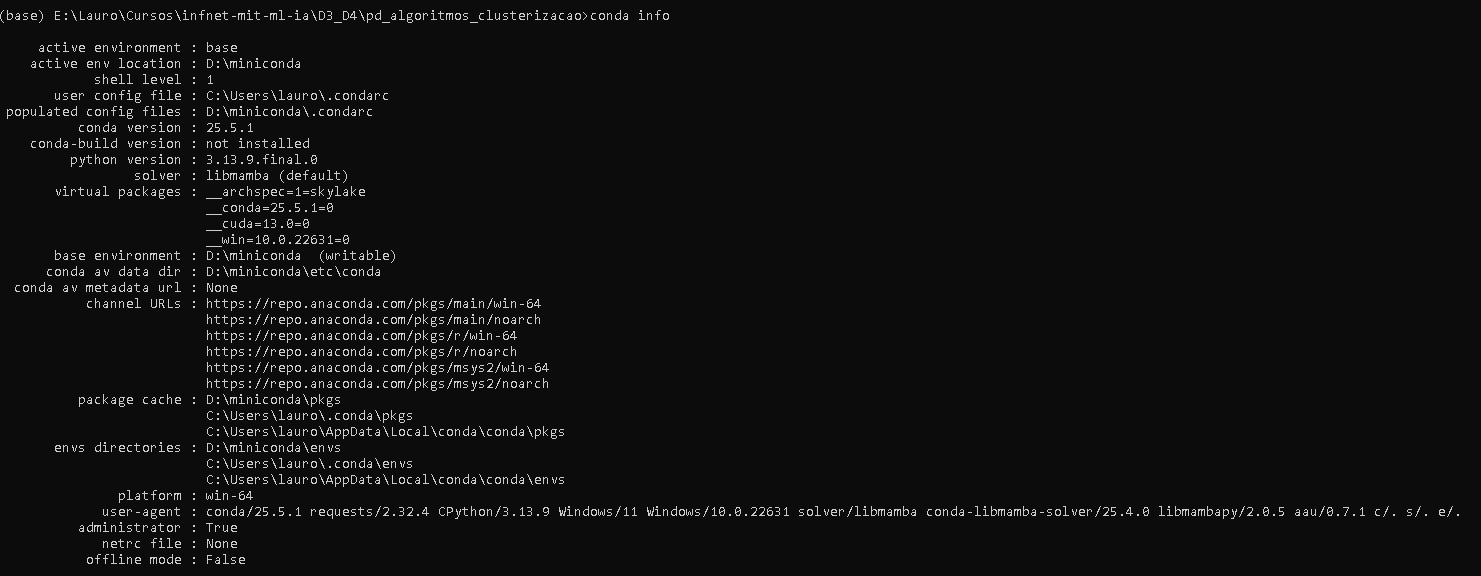

## Importação as bibliotecas

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from kaggle.api.kaggle_api_extended import KaggleApi
SEED=42
np.random.seed(SEED)

## Geração dos diretórios e download do dataset

In [18]:
# Inicializar a API do Kaggle
api = KaggleApi()
api.authenticate()

# Criar o diretório se não existir
data_path = 'data'
os.makedirs(data_path, exist_ok=True)

# Baixar os dados do Kaggle
api.dataset_download_files('rohan0301/unsupervised-learning-on-country-data', path=data_path, unzip=True)

path_raw = 'data/'
file_raw_1 = 'Country-data.csv'
file_raw_2 = 'data-dictionary.csv'
pathfile_raw_1 = os.path.join(path_raw, file_raw_1)
pathfile_raw_2 = os.path.join(path_raw, file_raw_2)

Dataset URL: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data


## Definição de funções

In [19]:
def histogram_per_variable_plot(X):
    for col in X.columns:
        plt.figure()
        plt.hist(X[col].dropna())
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel("freq")
        plt.show()

def pair_plot(data,figsize_x,figsize_y):
    sns.pairplot(data=data,diag_kind='kde')
    plt.figure(figsize=(figsize_x, figsize_y))
    plt.show()

def scatter_plot(data,x,y,figsize_x,figsize_y):
    sns.scatterplot(data=data,x=x,y=y)
    plt.figure(figsize=(figsize_x, figsize_y))
    plt.show()

def plot_data_clusters(data,centroids):
    for c in sorted(np.unique(data['cluster'])):
        subset = data[data["cluster"] == c]
        plt.scatter(subset["PCA1"], subset["PCA2"], s=80, alpha=0.8, label=f"Cluster {c}")

    plt.scatter(centroids[:,0], centroids[:,1], marker="X", s=100)
    plt.title("Clusters de Países")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_dendogram(X):
    # Plot the dendrogram
    plt.figure(figsize=(20, 6))
    
    # Compute the linkage matrix
    Z = linkage(X, method='ward')
    dendrogram(Z)
    plt.title("Dendrogram for Agglomerative Clustering")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.show()

## Análise exploratória

### Detalhamento do Dataset

In [20]:
df = pd.read_csv(pathfile_raw_1)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<span style="color: green;">Conforme mostrado acima, o dataset compõe 167 países</span>

In [21]:
df['country'].shape

(167,)

<span style="color: green;">Gráficos a faixa dinâmica</span>

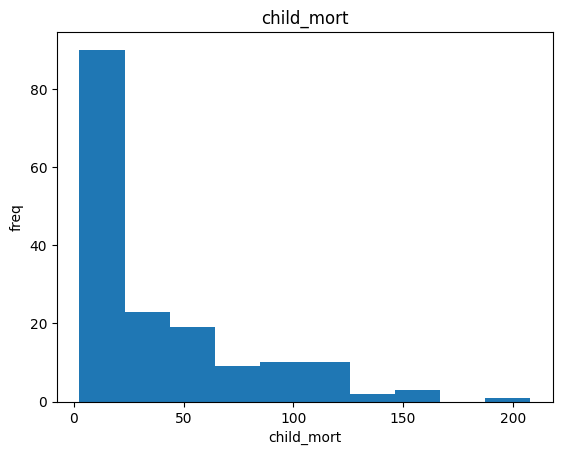

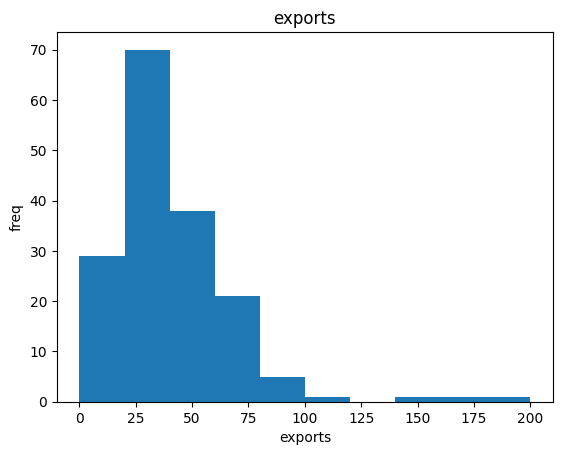

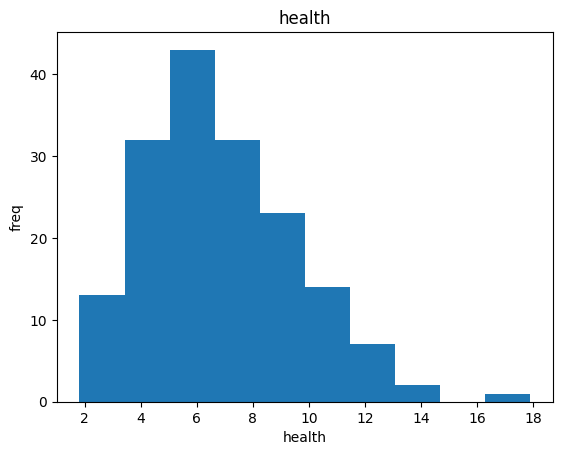

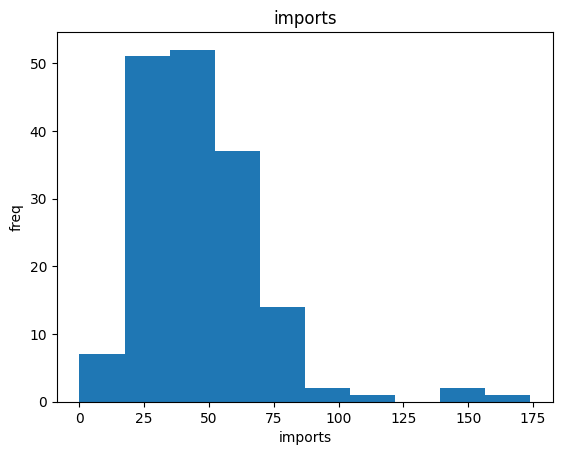

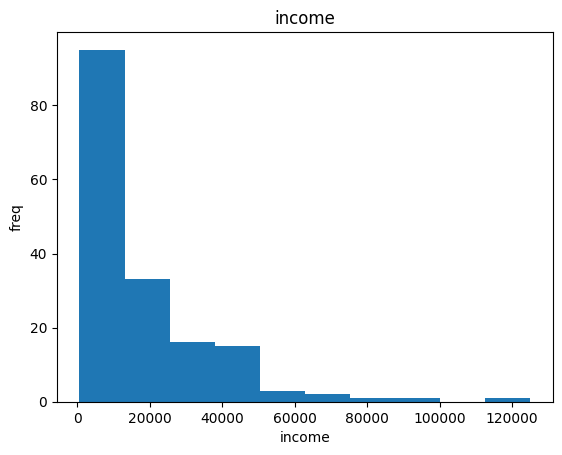

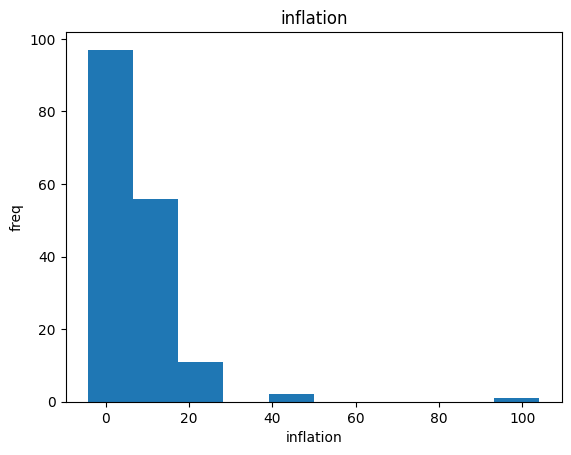

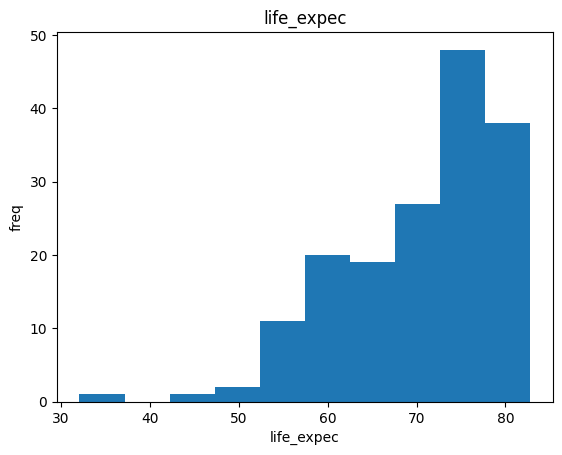

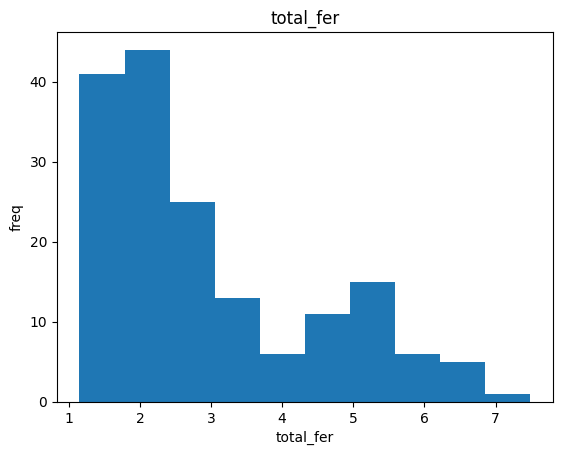

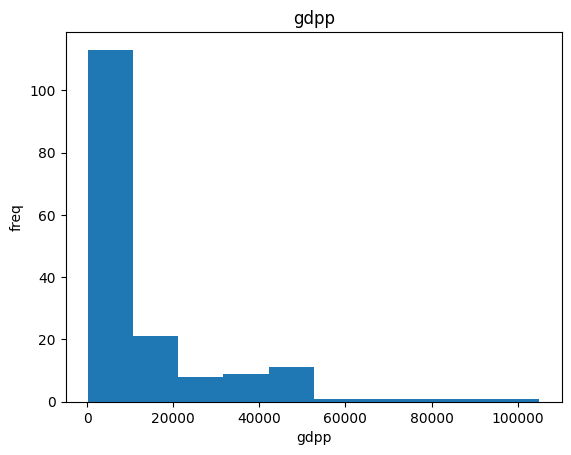

In [22]:
histogram_per_variable_plot(df.drop(['country'],axis=1))

### Tratamento dos dados

<b> Verificação de dados nulos no dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<b> Verificacao de dados duplicados no dataset

In [24]:
df[df['country'].duplicated() == True]['country']

Series([], Name: country, dtype: object)

<b> Padronização  dos dados

In [25]:
df.drop(['country'],axis=1).columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [26]:
scaler = StandardScaler()
df_scaled_features = pd.DataFrame(columns=df.drop(['country'],axis=1).columns,data=scaler.fit_transform(df.drop(['country'],axis=1)))

In [27]:
df_scaled = pd.concat([df['country'],df_scaled_features],axis=1)

In [28]:
df_scaled

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [29]:
Xs = df_scaled.drop(['country'],axis=1)

<b> Redução de dimensionalidade com PCA para facilitar o plot em 2D

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xs)

In [31]:
df_xpca = pd.DataFrame(columns=['PCA1','PCA2'],data=X_pca)

<b> Demonstração dos clusters "esféricos" em PCA2

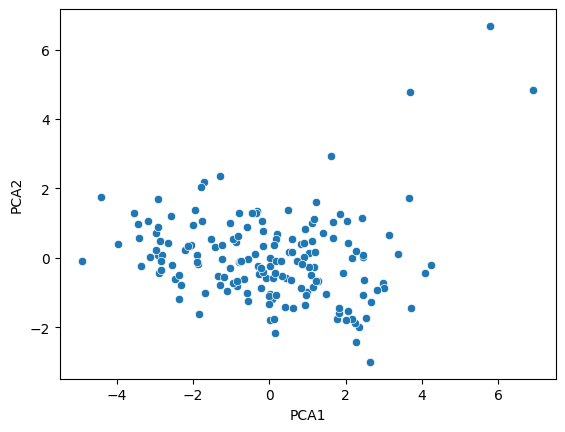

<Figure size 1000x500 with 0 Axes>

In [32]:
scatter_plot(data=df_xpca,x='PCA1',y='PCA2',figsize_x=10,figsize_y=5)

### Treinamento KMeans

<b> realizando o treinamento do modelo kmeans e gerando as labels

In [33]:
model_kmeans = KMeans(n_clusters=3,max_iter=500,init='k-means++', n_init=10)
km_labels = model_kmeans.fit_predict(Xs)
km_centroids = model_kmeans.cluster_centers_

<b> criação da coluna 'cluster'

In [34]:
df_xpca['cluster'] = km_labels
df_xpca

,PCA1,PCA2,cluster
0,-2.913025,0.095621,1
1,0.429911,-0.588156,2
2,-0.285225,-0.455174,2
3,-2.932423,1.695555,1
4,1.033576,0.136659,2
...,...,...,...
162,-0.820631,0.639570,2
163,-0.551036,-1.233886,2
164,0.498524,1.390744,2
165,-1.887451,-0.109453,1


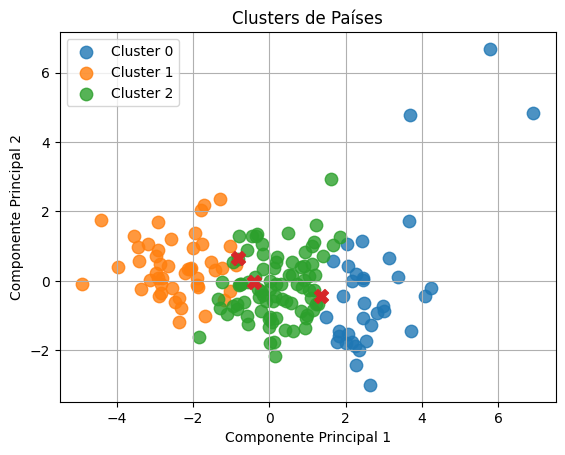

In [35]:
plot_data_clusters(data=df_xpca,centroids=km_centroids)

### Treinamento Agglomerative Cluster

In [36]:
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(Xs)

In [37]:
df_xpca['cluster'] = agg_labels
df_xpca

,PCA1,PCA2,cluster
0,-2.913025,0.095621,2
1,0.429911,-0.588156,1
2,-0.285225,-0.455174,1
3,-2.932423,1.695555,1
4,1.033576,0.136659,1
...,...,...,...
162,-0.820631,0.639570,1
163,-0.551036,-1.233886,1
164,0.498524,1.390744,1
165,-1.887451,-0.109453,1


<b> Geração do dendograma

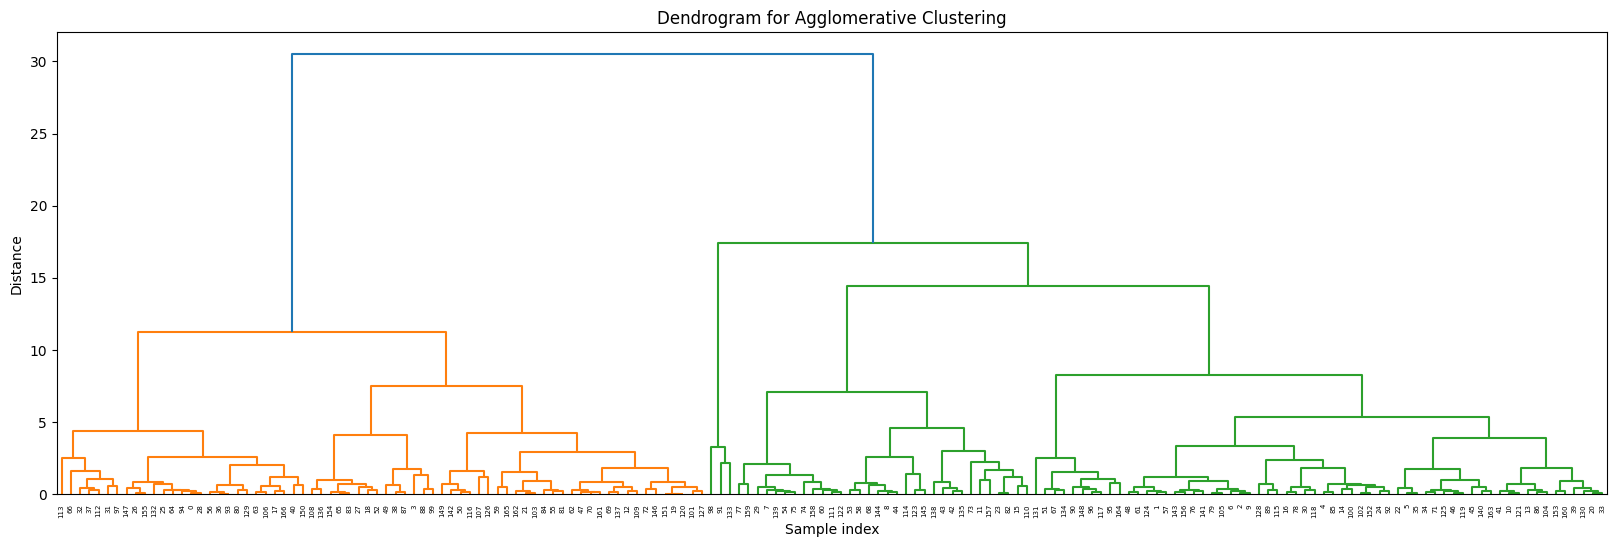

In [38]:
plot_dendogram(df_xpca)